# **Week 8: Lab Exercises for COMP499/691 Conversational AI**

This lab focuses on end-to-end speech recognizer. The aim is to help you become more comfortable with implementing a speech recognition system. Throughout the lab, we will be exploring various strategies and methods to achieve this goal.

## **Task Description**

This time, our focus is on Speech recognition, also known as automatic speech recognition(ASR) to process human speech into a written format. We feed a speech signal spoken in Serbian language into the model to generate the transcription for that.

Let's first download the dataset:


In [8]:
!wget -O cv-corpus-sr.tar.gz https://www.dropbox.com/scl/fi/yfs6xh3yhmukg6itiahoy/cv-corpus-12.0-2022-12-07-sr.tar.gz?rlkey=wv9syqbh8fsv6db5d6q6uznor&dl=0

--2025-03-26 21:38:28--  https://www.dropbox.com/scl/fi/yfs6xh3yhmukg6itiahoy/cv-corpus-12.0-2022-12-07-sr.tar.gz?rlkey=wv9syqbh8fsv6db5d6q6uznor
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc95c25e276e11dfa804a653f86f.dl.dropboxusercontent.com/cd/0/inline/CmpjQSFwCHaNbvcpXF6kJlluFTSoPaohaCVvKw43nuXj8U5aRWWO1RYLFh3aQlrFh-3YVSAAAwDupgrNryk_DPm65AejnKjaVrMqvQlTon-IwIXFZutgHJa96J55us1GNEEWwMSmr5ZTN-SlcluPNYLG/file# [following]
--2025-03-26 21:38:29--  https://uc95c25e276e11dfa804a653f86f.dl.dropboxusercontent.com/cd/0/inline/CmpjQSFwCHaNbvcpXF6kJlluFTSoPaohaCVvKw43nuXj8U5aRWWO1RYLFh3aQlrFh-3YVSAAAwDupgrNryk_DPm65AejnKjaVrMqvQlTon-IwIXFZutgHJa96J55us1GNEEWwMSmr5ZTN-SlcluPNYLG/file
Resolving uc95c25e276e11dfa804a653f86f.dl.dropboxusercontent.com (uc95c25e276e11dfa804a653f86f.dl.dropboxusercontent.co

We can now uncompress it:

In [9]:
%%capture
!tar -zxf cv-corpus-sr.tar.gz

We also have to install the needed libraries:

In [10]:
%%capture
!git clone https://github.com/speechbrain/speechbrain.git
%cd speechbrain
!pip install -r requirements.txt
!pip install .
%cd ..

## **Exercise 1: Data Preparation**

If you inspect the data stored in `/content/cv-corpus-12.0-2022-12-07/sr` you will see that there exist three tsv files ( train, valid, and dev). These tsv files contain the following information:

-   client_id,	path, sentence,	up_votes,	down_votes,	age,	gender,	accents,	locale,	segment.

There is a clips folder that contains all audio files.

For the ASR task, you need to go over each tsv file and extract the necessary information. Specifically, you need to get the path to the audio, the transcription(sentence) and the unique_id (you could use the name of the audio file as the unique identifier).


As you can see, we have a hierarchical structure in which the first key is a **unique identifier** of the spoken sentence. You could use  the name of the audio file as the unique identifier.
Then, we specify all the fields that are needed for the task addressed. For instance, we report the **path of the speech recording**, its **duration** in seconds (needed if we wanna sort the sentences before creating the mini-batches), and the **sequence of words** uttered in the given recording.

Also, since the ASR task could be computationally heavy, we only use a sub-sample of the data. Therefore, you need to get only 1 , 1/9 and 1/6 hours of data for training, validation, and test respectively. You could sample that using the sum of the calculated duration for each audio.

**Write the code for preparing the JSON data-manifest files**.You have to create 3 JSON files:
- 'train.json'
- 'valid.json'
- 'test.json'

They should be formatted in the following way:


**train.json**
```
{
  "common_voice_sr_26981130": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_26981130.mp3",
    "duration": 3.168,
    "words": "То све доказује."
  },
  "common_voice_sr_26981131": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/common_voice_sr_26981131.mp3",
    "duration": 2.988,
    "words": "А не може."
  },
  "common_voice_sr_26981132": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_26981132.mp3",
    "duration": 2.736,
    "words": "Он је пријатељ."
  },
....

```

**valid.json**
```
{
  "common_voice_sr_35090117": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35090117.mp3",
    "duration": 2.988,
    "words": "Па не знам."
  },
  "common_voice_sr_35090119": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35090119.mp3",
    "duration": 2.556,
    "words": "Како да нисам."
  },
  "common_voice_sr_35090120": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35090120.mp3",
    "duration": 2.376,
    "words": "За пет минута."
  },
....
```

**test.json**

```
{
  "common_voice_sr_35087568": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35087568.mp3",
    "duration": 3.276,
    "words": "Ја сам сам!"
  },
  "common_voice_sr_27607049": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_27607049.mp3",
    "duration": 3.636,
    "words": "Реци и мени!"
  },
  "common_voice_sr_27607050": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_27607050.mp3",
    "duration": 3.42,
    "words": "Хајде, хајде тамо."
  },
....
```

**Suggestions:**
- You can get the number of samples of each wave with torchaudio.info. You have to compute the duration in seconds by diving it for the sampling frequency.
- Since training could be time-consuming, you could start with a tiny amount of data for debugging. And when you are sure about your implementation, you could run it on the original dataset to get the final result.


In [11]:
import pandas as pd
import json
import torchaudio
from tqdm.contrib import tzip
import re
from speechbrain.dataio.dataio import read_audio

# Create the data-manifest files
def create_json(tsv_file,data_folder,json_file,csv_file,max_duration):
  # Your code here

  json_dict = {}

  df = pd.read_csv(tsv_file, sep='\t')
  total_duration = 0.0

  for index, row in df.iterrows():

    path = data_folder+"/clips/"+row['path']
    audioinfo = torchaudio.info(path)
    duration = audioinfo.num_frames / audioinfo.sample_rate
    words = row['sentence']

    uttid = row['path'].split(".")[0]

    if total_duration + duration <= max_duration:
      total_duration += duration

      # Create entry for this utterance
      json_dict[uttid] = {
              "path": path,
              "duration": duration,
              "words": words,
      }

      # Writing the dictionary to the json file
      with open(json_file, mode="w", encoding="utf-8") as json_f:
        json.dump(json_dict, json_f,ensure_ascii=False, indent=2)
    else:
      break


# Set up data folder
data_folder='/content/cv-corpus-12.0-2022-12-07/sr'
max_durations=[3600,400,600] # Total durations in seconds for train, valid, test.

# Create json files
create_json(data_folder+'/train.tsv',data_folder,'train.json','train.csv',max_durations[0])
create_json(data_folder+'/dev.tsv',data_folder,'valid.json','dev.csv',max_durations[1])
create_json(data_folder+'/test.tsv',data_folder,'test.json','test.csv',max_durations[2])

## **Exercise 2: Speech recognition with Wav2vec + CTC Loss**

You have to implement the following model:

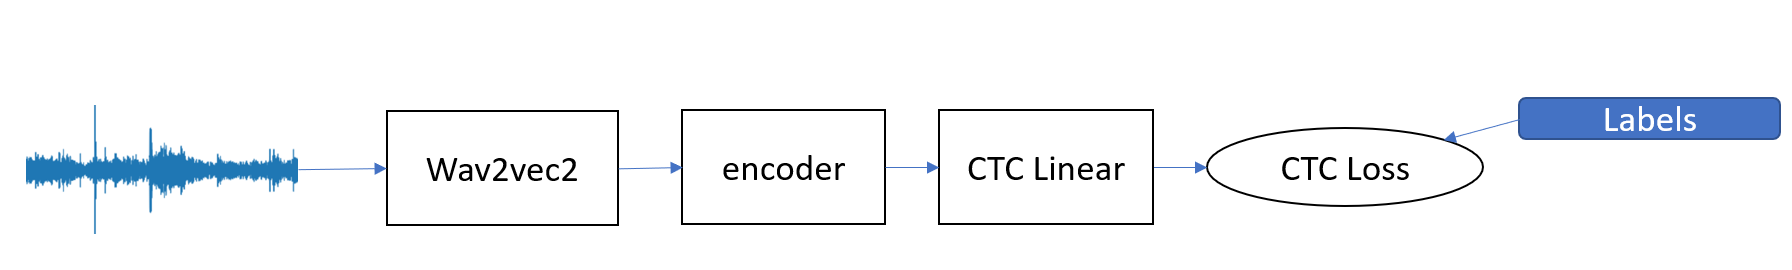

For wav2vec2, you should use  https://huggingface.co/facebook/wav2vec2-large-xlsr-53 for the pretrained model and finetune it. In order to be able to use this model, you need to have a huggingface access token and log-in using this token with the following code:



```
from huggingface_hub import notebook_login
notebook_login()
```



For the encoder,

- linear1 : (wav2vec_output_dim, 1024)
- BatchNorm1d
- LeakyReLU
- Dropout : 0.15
- linear2:  ( 1024, 1024)
- BatchNorm1d
- LeakyReLU
- Dropout : 0.15
- linear3 :( 1024, 1024)
- BatchNorm1d
- LeakyReLU

For CTC Linear, you could use a linear layer which converts the previous layer output to output_neurons.

For CTC Loss, you should use ctc_loss from speechbrain.

**Important**: Use ``warmup_steps: 25`` and ``output_neurons: 500``

You can draw inspiration from existing speechbrain recipes. For instance take a look at the Commonvoice recipes available [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/CommonVoice/ASR/CTC). See in particular, `train_with_wav2vec.py` and `hparams/train_*_with_wav2vec.yaml`.



In [12]:
from huggingface_hub import notebook_login
notebook_login()

**Write the code for the hyperparameters**:


You need to fill specified parts in the hparams file.

In [13]:
%%file hparams_sr_wav2vec.yaml

# ################################
# Model: wav2vec2 + DNN + CTC
# Augmentation: SpecAugment
# Authors: Titouan Parcollet 2021
# ################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1234
__set_seed: !apply:speechbrain.utils.seed_everything [!ref <seed>]
output_folder: !ref results/wav2vec2_ctc_rw/<seed>
test_wer_file: !ref <output_folder>/wer_test.txt
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# URL for the biggest Fairseq multilingual
wav2vec2_hub: facebook/wav2vec2-large-xlsr-53
wav2vec2_folder: !ref <save_folder>/wav2vec2_checkpoint

# Data files
data_folder: !PLACEHOLDER  # e.g, /localscratch/cv-corpus-5.1-2020-06-22/fr
# train_tsv_file: !ref <data_folder>/train.tsv  # Standard CommonVoice .tsv files
# dev_tsv_file: !ref <data_folder>/dev.tsv  # Standard CommonVoice .tsv files
# test_tsv_file: !ref <data_folder>/test.tsv  # Standard CommonVoice .tsv files
accented_letters: True
language: sr
train_csv: !ref train.csv
valid_csv: !ref dev.csv
test_csv: !ref test.csv
skip_prep: False # Skip data preparation

# We remove utterance slonger than 10s in the train/dev/test sets as
# longer sentences certainly correspond to "open microphones".
avoid_if_longer_than: 10.0

####################### Training Parameters ####################################

number_of_epochs: 30
lr: 1.0
lr_wav2vec: 0.0001
sorting: ascending
precision: fp32 # bf16, fp16 or fp32
sample_rate: 16000
ckpt_interval_minutes: 30 # save checkpoint every N min


# With data_parallel batch_size is split into N jobs
# With DDP batch_size is multiplied by N jobs
# Must be 6 per GPU to fit 32GB of VRAM
dynamic_batching: False
batch_size: 12
test_batch_size: 4

dataloader_options:
    batch_size: !ref <batch_size>
    num_workers: 6
test_dataloader_options:
    batch_size: !ref <test_batch_size>
    num_workers: 6

# BPE parameters
token_type: unigram  # ["unigram", "bpe", "char"]
character_coverage: 1.0

####################### Model Parameters #######################################
# activation: !name:torch.nn.LeakyReLU
wav2vec_output_dim: 1024
dnn_neurons: 1024
freeze_wav2vec: False
freeze_feature_extractor: False
dropout: 0.15
warmup_steps: 25

# Outputs
output_neurons: 500  # BPE size, index(blank/eos/bos) = 0

# Decoding parameters
# Be sure that the bos and eos index match with the BPEs ones
blank_index: 0
bos_index: 1
eos_index: 2

# Decoding parameters
test_beam_search:
    blank_index: !ref <blank_index>
    beam_size: 100
    beam_prune_logp: -12.0
    token_prune_min_logp: -1.2
    prune_history: True
    topk: 1
    alpha: 1.0
    beta: 0.5
    # To use n-gram LM for decoding, follow steps in README.md.
    # kenlm_model_path: none
#
# Functions and classes
#
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

############################## Augmentations ###################################

# Speed perturbation
speed_perturb: !new:speechbrain.augment.time_domain.SpeedPerturb
    orig_freq: !ref <sample_rate>
    speeds: [95, 100, 105]

# Frequency drop: randomly drops a number of frequency bands to zero.
drop_freq: !new:speechbrain.augment.time_domain.DropFreq
    drop_freq_low: 0
    drop_freq_high: 1
    drop_freq_count_low: 1
    drop_freq_count_high: 3
    drop_freq_width: 0.05

# Time drop: randomly drops a number of temporal chunks.
drop_chunk: !new:speechbrain.augment.time_domain.DropChunk
    drop_length_low: 1000
    drop_length_high: 2000
    drop_count_low: 1
    drop_count_high: 5

# Augmenter: Combines previously defined augmentations to perform data augmentation
wav_augment: !new:speechbrain.augment.augmenter.Augmenter
    min_augmentations: 3
    max_augmentations: 3
    augment_prob: 1.0
    augmentations: [
        !ref <speed_perturb>,
        !ref <drop_freq>,
        !ref <drop_chunk>]

############################## Models ##########################################

enc: !new:speechbrain.nnet.containers.Sequential
    input_shape: [null, null, !ref <wav2vec_output_dim>]
    linear1: !name:speechbrain.nnet.linear.Linear
        n_neurons: !ref <dnn_neurons>
        bias: True
    bn1: !name:speechbrain.nnet.normalization.BatchNorm1d
    activation: !new:torch.nn.LeakyReLU
    drop: !new:torch.nn.Dropout
        p: !ref <dropout>
    linear2: !name:speechbrain.nnet.linear.Linear
        n_neurons: !ref <dnn_neurons>
        bias: True
    bn2: !name:speechbrain.nnet.normalization.BatchNorm1d
    activation2: !new:torch.nn.LeakyReLU
    drop2: !new:torch.nn.Dropout
        p: !ref <dropout>
    linear3: !name:speechbrain.nnet.linear.Linear
        n_neurons: !ref <dnn_neurons>
        bias: True
    bn3: !name:speechbrain.nnet.normalization.BatchNorm1d
    activation3: !new:torch.nn.LeakyReLU

wav2vec2: !new:speechbrain.lobes.models.huggingface_transformers.wav2vec2.Wav2Vec2
    source: !ref <wav2vec2_hub>
    output_norm: True
    freeze: !ref <freeze_wav2vec>
    freeze_feature_extractor: !ref <freeze_feature_extractor>
    save_path: !ref <wav2vec2_folder>

#####
# Uncomment this block if you prefer to use a Fairseq pretrained model instead
# of a HuggingFace one. Here, we provide an URL that is obtained from the
# Fairseq github for the multilingual XLSR.
#
#wav2vec2_url: https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr_53_56k.pt
#wav2vec2: !new:speechbrain.lobes.models.fairseq_wav2vec.FairseqWav2Vec2
#    pretrained_path: !ref <wav2vec2_url>
#    output_norm: True
#    freeze: False
#    save_path: !ref <save_folder>/wav2vec2_checkpoint/model.pt
#####


ctc_lin: !new:speechbrain.nnet.linear.Linear
    input_size: !ref <dnn_neurons>
    n_neurons: !ref <output_neurons>

log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

ctc_cost: !name:speechbrain.nnet.losses.ctc_loss
    blank_index: !ref <blank_index>

modules:
    wav2vec2: !ref <wav2vec2>
    enc: !ref <enc>
    ctc_lin: !ref <ctc_lin>

model: !new:torch.nn.ModuleList
    - [!ref <enc>, !ref <ctc_lin>]

model_opt_class: !name:torch.optim.Adadelta
    lr: !ref <lr>
    rho: 0.95
    eps: 1.e-8

wav2vec_opt_class: !name:torch.optim.Adam
    lr: !ref <lr_wav2vec>

lr_annealing_model: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0

lr_annealing_wav2vec: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr_wav2vec>
    improvement_threshold: 0.0025
    annealing_factor: 0.9
    patient: 0

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        wav2vec2: !ref <wav2vec2>
        model: !ref <model>
        scheduler_model: !ref <lr_annealing_model>
        scheduler_wav2vec: !ref <lr_annealing_wav2vec>
        counter: !ref <epoch_counter>

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_rate_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats

cer_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats
    split_tokens: True

Overwriting hparams_sr_wav2vec.yaml


**Write the code for the training script**:

 You need to complete compute_forward, compute_objectives and dataio_prepare functions.



In [ ]:
%%file train_with_wav2vec.py

#!/usr/bin/env python3
"""Recipe for training a sequence-to-sequence ASR system with CommonVoice.
The system employs a wav2vec2 encoder and a CTC decoder.
Decoding is performed with greedy decoding (will be extended to beam search).

To run this recipe, do the following:
> python train_with_wav2vec2.py hparams/train_with_wav2vec2.yaml

With the default hyperparameters, the system employs a pretrained wav2vec2 encoder.
The wav2vec2 model is pretrained following the model given in the hparams file.
It may be dependent on the language.

The neural network is trained with CTC on sub-word units estimated with
Byte Pairwise Encoding (BPE).

The experiment file is flexible enough to support a large variety of
different systems. By properly changing the parameter files, you can try
different encoders, decoders, tokens (e.g, characters instead of BPE),
training languages (all CommonVoice languages), and many
other possible variations.

Authors
 * Titouan Parcollet 2021
"""

import sys
import torch
import torchaudio
from hyperpyyaml import load_hyperpyyaml

import speechbrain as sb
from speechbrain.tokenizers.SentencePiece import SentencePiece
from speechbrain.utils.data_utils import undo_padding


from speechbrain.utils.distributed import if_main_process,run_on_main
from speechbrain.utils.logger import get_logger

import pandas as pd
import json
from tqdm.contrib import tzip
from speechbrain.dataio.dataio import read_audio

logger = get_logger(__name__)


class ASR(sb.core.Brain):
    def compute_forward(self, batch, stage):
        """Forward computations from the waveform batches to the output probabilities."""


        batch = batch.to(self.device)
        wavs, wav_lens = batch.sig
        wavs, wav_lens = wavs.to(self.device), wav_lens.to(self.device)

        # Optional waveform augmentation
        if stage == sb.Stage.TRAIN and hasattr(self.hparams, "wav_augment"):
            wavs, wav_lens = self.hparams.wav_augment(wavs, wav_lens)

        # Forward pass: Wav2Vec2 → DNN → CTC linear → log-softmax
        feats = self.modules.wav2vec2(wavs, wav_lens)
        x = self.modules.enc(feats)
        logits = self.modules.ctc_lin(x)
        p_ctc = self.hparams.log_softmax(logits)

        p_tokens = None
        # During VALID or TEST, decode with greedy or beam search
        if stage == sb.Stage.VALID:
            p_tokens = sb.decoders.ctc_greedy_decode(
                p_ctc, wav_lens, blank_id=self.hparams.blank_index
            )
        elif stage == sb.Stage.TEST:
            # If using beam search:
            p_tokens = test_searcher(p_ctc, wav_lens)

        return p_ctc, wav_lens, p_tokens



    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss (CTC) given predictions and targets."""

        p_ctc, wav_lens, p_tokens = predictions

        ids = batch.id
        tokens_eos, tokens_eos_lens = batch.tokens_eos
        tokens, tokens_lens = batch.tokens

        if stage == sb.Stage.TRAIN and hasattr(self.hparams, "wav_augment"):
            tokens = self.hparams.wav_augment.replicate_labels(tokens)
            tokens_lens = self.hparams.wav_augment.replicate_labels(tokens_lens)

        loss = self.hparams.ctc_cost(p_ctc, tokens, wav_lens, tokens_lens)

        if stage == sb.Stage.VALID:
            # Convert token indices to words
            predicted_words = self.tokenizer(p_tokens, task="decode_from_list")

        elif stage == sb.Stage.TEST:
            predicted_words = [hyp[0].text.split(" ") for hyp in p_tokens]

        if stage != sb.Stage.TRAIN:
            # Convert indices to words
            target_words = undo_padding(tokens, tokens_lens)
            target_words = self.tokenizer(target_words, task="decode_from_list")

            self.wer_metric.append(ids, predicted_words, target_words)
            self.cer_metric.append(ids, predicted_words, target_words)

        return loss

    def on_stage_start(self, stage, epoch):
        if stage != sb.Stage.TRAIN:
            self.cer_metric = self.hparams.cer_computer()
            self.wer_metric = self.hparams.error_rate_computer()


    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of an epoch."""
        # Compute/store important stats
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats
        else:
            stage_stats["CER"] = self.cer_metric.summarize("error_rate")
            stage_stats["WER"] = self.wer_metric.summarize("error_rate")

        # Perform end-of-iteration things, like annealing, logging, etc.
        if stage == sb.Stage.VALID:
            old_lr_model, new_lr_model = self.hparams.lr_annealing_model(
                stage_stats["loss"]
            )
            old_lr_wav2vec, new_lr_wav2vec = self.hparams.lr_annealing_wav2vec(
                stage_stats["loss"]
            )
            sb.nnet.schedulers.update_learning_rate(
                self.model_optimizer, new_lr_model
            )
            if not self.hparams.wav2vec2.freeze:
                sb.nnet.schedulers.update_learning_rate(
                    self.wav2vec_optimizer, new_lr_wav2vec
                )
            self.hparams.train_logger.log_stats(
                stats_meta={
                    "epoch": epoch,
                    "lr_model": old_lr_model,
                    "lr_wav2vec": old_lr_wav2vec,
                },
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta={"WER": stage_stats["WER"]},
                min_keys=["WER"],
            )
        elif stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stage_stats,
            )
            if if_main_process():
                with open(
                    self.hparams.test_wer_file, "w", encoding="utf-8"
                ) as w:
                    self.wer_metric.write_stats(w)



    def init_optimizers(self):
        "Initializes the wav2vec2 optimizer and model optimizer"

        # If the wav2vec encoder is unfrozen, we create the optimizer
        if not self.hparams.wav2vec2.freeze:
            self.wav2vec_optimizer = self.hparams.wav2vec_opt_class(
                self.modules.wav2vec2.parameters()
            )
            if self.checkpointer is not None:
                self.checkpointer.add_recoverable(
                    "wav2vec_opt", self.wav2vec_optimizer
                )

        self.model_optimizer = self.hparams.model_opt_class(
            self.hparams.model.parameters()
        )

        if self.checkpointer is not None:
            self.checkpointer.add_recoverable("modelopt", self.model_optimizer)

        if not self.hparams.wav2vec2.freeze:
            self.optimizers_dict = {
                "wav2vec_optimizer": self.wav2vec_optimizer,
                "model_optimizer": self.model_optimizer,
            }
        else:
            self.optimizers_dict = {"model_optimizer": self.model_optimizer}

    def freeze_optimizers(self, optimizers):
        """Freezes the wav2vec2 optimizer according to the warmup steps"""
        valid_optimizers = {}
        if not self.hparams.wav2vec2.freeze:
            if self.optimizer_step >= self.hparams.warmup_steps:
                valid_optimizers["wav2vec_optimizer"] = optimizers[
                    "wav2vec_optimizer"
                ]
        valid_optimizers["model_optimizer"] = optimizers["model_optimizer"]
        return valid_optimizers


# Define custom data procedure
def dataio_prepare(hparams, tokenizer):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions.
    """

    # 1. Define datasets
    data_folder = hparams["data_folder"]

    train_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["train_csv"],
        replacements={"data_root": data_folder},
    )

    if hparams["sorting"] == "ascending":
        # we sort training data to speed up training and get better results.
        train_data = train_data.filtered_sorted(
            sort_key="duration",
            key_max_value={"duration": hparams["avoid_if_longer_than"]},
        )
        # when sorting do not shuffle in dataloader ! otherwise is pointless
        hparams["dataloader_options"]["shuffle"] = False

    elif hparams["sorting"] == "descending":
        train_data = train_data.filtered_sorted(
            sort_key="duration",
            reverse=True,
            key_max_value={"duration": hparams["avoid_if_longer_than"]},
        )
        # when sorting do not shuffle in dataloader ! otherwise is pointless
        hparams["dataloader_options"]["shuffle"] = False

    elif hparams["sorting"] == "random":
        pass

    else:
        raise NotImplementedError(
            "sorting must be random, ascending or descending"
        )

    valid_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["valid_csv"],
        replacements={"data_root": data_folder},
    )
    # We also sort the validation data so it is faster to validate
    valid_data = valid_data.filtered_sorted(sort_key="duration")

    test_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["test_csv"],
        replacements={"data_root": data_folder},
    )

    # We also sort the validation data so it is faster to validate
    test_data = test_data.filtered_sorted(sort_key="duration")

    datasets = [train_data, valid_data, test_data]

    # 2. Define audio pipeline:
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        info = torchaudio.info(wav)
        sig = sb.dataio.dataio.read_audio(wav)
        resampled = torchaudio.transforms.Resample(
            info.sample_rate,
            hparams["sample_rate"],
        )(sig)
        return resampled

    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline)

    # 3. Define text pipeline:
    @sb.utils.data_pipeline.takes("wrd")
    @sb.utils.data_pipeline.provides(
        "tokens_list", "tokens_bos", "tokens_eos", "tokens"
    )
    def text_pipeline(wrd):
        tokens_list = tokenizer.sp.encode_as_ids(wrd)
        yield tokens_list
        tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
        yield tokens_bos
        tokens_eos = torch.LongTensor(tokens_list + [hparams["eos_index"]])
        yield tokens_eos
        tokens = torch.LongTensor(tokens_list)
        yield tokens

    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(
        datasets,
        ["id", "sig", "tokens_bos", "tokens_eos", "tokens"],
    )

    # 5. If Dynamic Batching is used, we instantiate the needed samplers.
    train_batch_sampler = None
    valid_batch_sampler = None
    if hparams["dynamic_batching"]:
        from speechbrain.dataio.sampler import DynamicBatchSampler  # noqa

        dynamic_hparams_train = hparams["dynamic_batch_sampler_train"]
        dynamic_hparams_valid = hparams["dynamic_batch_sampler_valid"]

        train_batch_sampler = DynamicBatchSampler(
            train_data,
            length_func=lambda x: x["duration"],
            **dynamic_hparams_train,
        )
        valid_batch_sampler = DynamicBatchSampler(
            valid_data,
            length_func=lambda x: x["duration"],
            **dynamic_hparams_valid,
        )

    return (
        train_data,
        valid_data,
        test_data,
        train_batch_sampler,
        valid_batch_sampler,
    )



# Create the data-manifest files
def create_csv(tsv_file,data_folder,csv_file,max_duration):
  # Your code here

  csv_rows = []

  df = pd.read_csv(tsv_file, sep='\t')

  for index, row in df.iterrows():

    path = data_folder+"/clips/"+row['path']
    audioinfo = torchaudio.info(path)
    duration = audioinfo.num_frames / audioinfo.sample_rate
    words = row['sentence']

    uttid = row['path'].split(".")[0]

    if duration > max_duration:
      continue

    csv_rows.append({
            "ID": uttid,
            "path": path,
            "wrd": words,
            "duration": duration
        })


    csv_df = pd.DataFrame(csv_rows)
    csv_df.to_csv(csv_file, index=False, encoding="utf-8")


if __name__ == "__main__":

    # Set up data folder
    data_folder='/content/cv-corpus-12.0-2022-12-07/sr'
    max_durations=[3600,400,600] # Total durations in seconds for train, valid, test.

    # Create json files
    create_csv(data_folder+'/train.tsv',data_folder,'train.csv',max_durations[0])
    create_csv(data_folder+'/dev.tsv',data_folder,'dev.csv',max_durations[1])
    create_csv(data_folder+'/test.tsv',data_folder,'test.csv',max_durations[2])

    # Load hyperparameters file with command-line overrides
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file, encoding="utf-8") as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # create ddp_group with the right communication protocol
    sb.utils.distributed.ddp_init_group(run_opts)

    # # Dataset preparation (parsing CommonVoice)
    # from common_voice_prepare import prepare_common_voice  # noqa

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Defining tokenizer and loading it
    tokenizer = SentencePiece(
        model_dir=hparams["save_folder"],
        vocab_size=hparams["output_neurons"],
        annotation_train=hparams["train_csv"],
        annotation_read="wrd",
        model_type=hparams["token_type"],
        character_coverage=hparams["character_coverage"],
    )

    # Create the datasets objects as well as tokenization and encoding :-D
    (
        train_data,
        valid_data,
        test_data,
        train_bsampler,
        valid_bsampler,
    ) = dataio_prepare(hparams, tokenizer)

    # Trainer initialization
    asr_brain = ASR(
        modules=hparams["modules"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # Adding objects to trainer.
    asr_brain.tokenizer = tokenizer
    vocab_list = [
        tokenizer.sp.id_to_piece(i) for i in range(tokenizer.sp.vocab_size())
    ]

    from speechbrain.decoders.ctc import CTCBeamSearcher

    test_searcher = CTCBeamSearcher(
        **hparams["test_beam_search"],
        vocab_list=vocab_list,
    )

    # Manage dynamic batching
    train_dataloader_opts = hparams["dataloader_options"]
    valid_dataloader_opts = hparams["test_dataloader_options"]
    if train_bsampler is not None:
        collate_fn = None
        if "collate_fn" in train_dataloader_opts:
            collate_fn = train_dataloader_opts["collate_fn"]

        train_dataloader_opts = {
            "batch_sampler": train_bsampler,
            "num_workers": hparams["num_workers"],
        }

        if collate_fn is not None:
            train_dataloader_opts["collate_fn"] = collate_fn

    if valid_bsampler is not None:
        collate_fn = None
        if "collate_fn" in valid_dataloader_opts:
            collate_fn = valid_dataloader_opts["collate_fn"]

        valid_dataloader_opts = {"batch_sampler": valid_bsampler}

        if collate_fn is not None:
            valid_dataloader_opts["collate_fn"] = collate_fn

    # Training
    asr_brain.fit(
        asr_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=train_dataloader_opts,
        valid_loader_kwargs=valid_dataloader_opts,
    )

    # Test
    asr_brain.evaluate(
        test_data,
        min_key="WER",
        test_loader_kwargs=hparams["test_dataloader_options"],
    )

Overwriting train_with_wav2vec.py


**Run the code below** to train the model

It would take around 20-30 minutes on GPU.

In [15]:
# Remember: Delete the output folder to start training from scratch
!rm -rf ./results/*

# Run Training
!python train_with_wav2vec.py hparams_sr_wav2vec.yaml  --data_folder='/content/' --device='cuda:0' --number_of_epochs=10 --seed=1986

2025-03-26 21:41:35.615464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743025295.636441    6971 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743025295.642766    6971 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-26 21:41:35.664459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
config.json: 100% 1.77k/1.77k [00:00<00:00, 9.72MB/s]
pytorch_model.bin: 100% 1.27G/1.27G [00:18<00:00, 68.9MB/s]
pre

The expected error rate in testing is around 80%. But don't lose hope! Adding more data could make the model much better. We suggest fine-tuning the model with [Whisper](https://arxiv.org/abs/2212.04356) for extra practice.
You can find examples on how to do this [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/CommonVoice/ASR/transformer).